In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from scipy import stats

np.random.seed(42)

In [2]:
df = pd.read_csv('C:\\Users\\Michelle Wan\\Documents\\Business analytics\\HW1_Data.csv')
df.head()

,revenue,outcalls,incalls,months,eqpdays,webcap,marryyes,travel,pcown,creditcd,retcalls,churndep
0,83.53,20.00,1.0,31,745,1,0,0,0,0,4,1
1,29.99,0.00,0.0,52,1441,0,0,0,1,1,3,1
2,37.75,2.67,0.0,25,572,0,0,0,1,1,3,1
3,5.25,0.00,0.0,45,1354,0,0,0,0,0,2,1
4,42.71,8.67,0.0,27,224,1,0,0,0,0,3,1


In [3]:
df.describe()

,revenue,outcalls,incalls,months,eqpdays,webcap,marryyes,travel,pcown,creditcd,retcalls,churndep
count,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000
mean,58.665179,24.951385,8.065277,18.761908,391.222633,0.894704,0.363175,0.057163,0.184817,0.676931,0.044088,0.497162
std,44.163859,34.790147,16.610589,9.548019,254.998478,0.306939,0.480922,0.232158,0.388155,0.467656,0.224552,0.500000
min,-5.860000,0.000000,0.000000,6.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.450000,3.000000,0.000000,11.000000,212.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.380000,13.330000,2.000000,17.000000,341.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,71.040000,33.330000,9.000000,24.000000,530.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,861.110000,610.330000,404.000000,60.000000,1812.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


array([[<AxesSubplot:title={'center':'churndep'}>]], dtype=object)

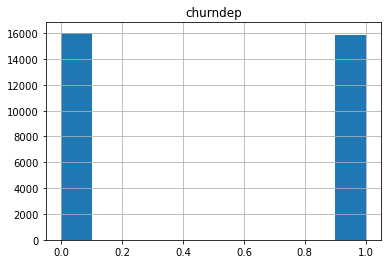

In [4]:
df.hist(column='churndep')

In [5]:
X=df.iloc[:,:11]
y=df.iloc[:,11]

In [6]:
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib.pyplot import figure

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [7]:
from sklearn.metrics import accuracy_score
for i in range(2,50,1):
    dt = tree.DecisionTreeClassifier(criterion = "entropy",max_leaf_nodes=i)
    y_pred = dt.fit(X_train, y_train).predict(X_test)
    rate=accuracy_score(y_test,y_pred)
    print(str(i) + " " + str(rate))

2 0.5857023411371237
3 0.5857023411371237
4 0.5977215719063546
5 0.5977215719063546
6 0.6002299331103679
7 0.6002299331103679
8 0.6002299331103679
9 0.6002299331103679
10 0.6002299331103679
11 0.6002299331103679
12 0.6005434782608695
13 0.6005434782608695
14 0.6006479933110368
15 0.6006479933110368
16 0.6006479933110368
17 0.6006479933110368
18 0.6006479933110368
19 0.6006479933110368
20 0.6005434782608695
21 0.6003344481605352
22 0.6003344481605352
23 0.6002299331103679
24 0.6005434782608695
25 0.6003344481605352
26 0.6003344481605352
27 0.6003344481605352
28 0.5999163879598662
29 0.5982441471571907
30 0.5978260869565217
31 0.5978260869565217
32 0.597930602006689
33 0.5977215719063546
34 0.5978260869565217
35 0.597930602006689
36 0.5968854515050167
37 0.5971989966555183
38 0.5971989966555183
39 0.5971989966555183
40 0.5971989966555183
41 0.5974080267558528
42 0.5971989966555183
43 0.5975125418060201
44 0.5973035117056856
45 0.5973035117056856
46 0.5973035117056856
47 0.597303511705685

In [8]:
for i in np.arange(0,0.011,0.001):
    dt = tree.DecisionTreeClassifier(criterion = "entropy",min_impurity_decrease=i)
    y_pred = dt.fit(X_train, y_train).predict(X_test)
    rate=accuracy_score(y_test,y_pred)
    print(str(i) + " " + str(rate))

0.0 0.5403428093645485
0.001 0.6002299331103679
0.002 0.5977215719063546
0.003 0.5977215719063546
0.004 0.5977215719063546
0.005 0.5857023411371237
0.006 0.5857023411371237
0.007 0.5857023411371237
0.008 0.5857023411371237
0.009000000000000001 0.5857023411371237
0.01 0.5857023411371237


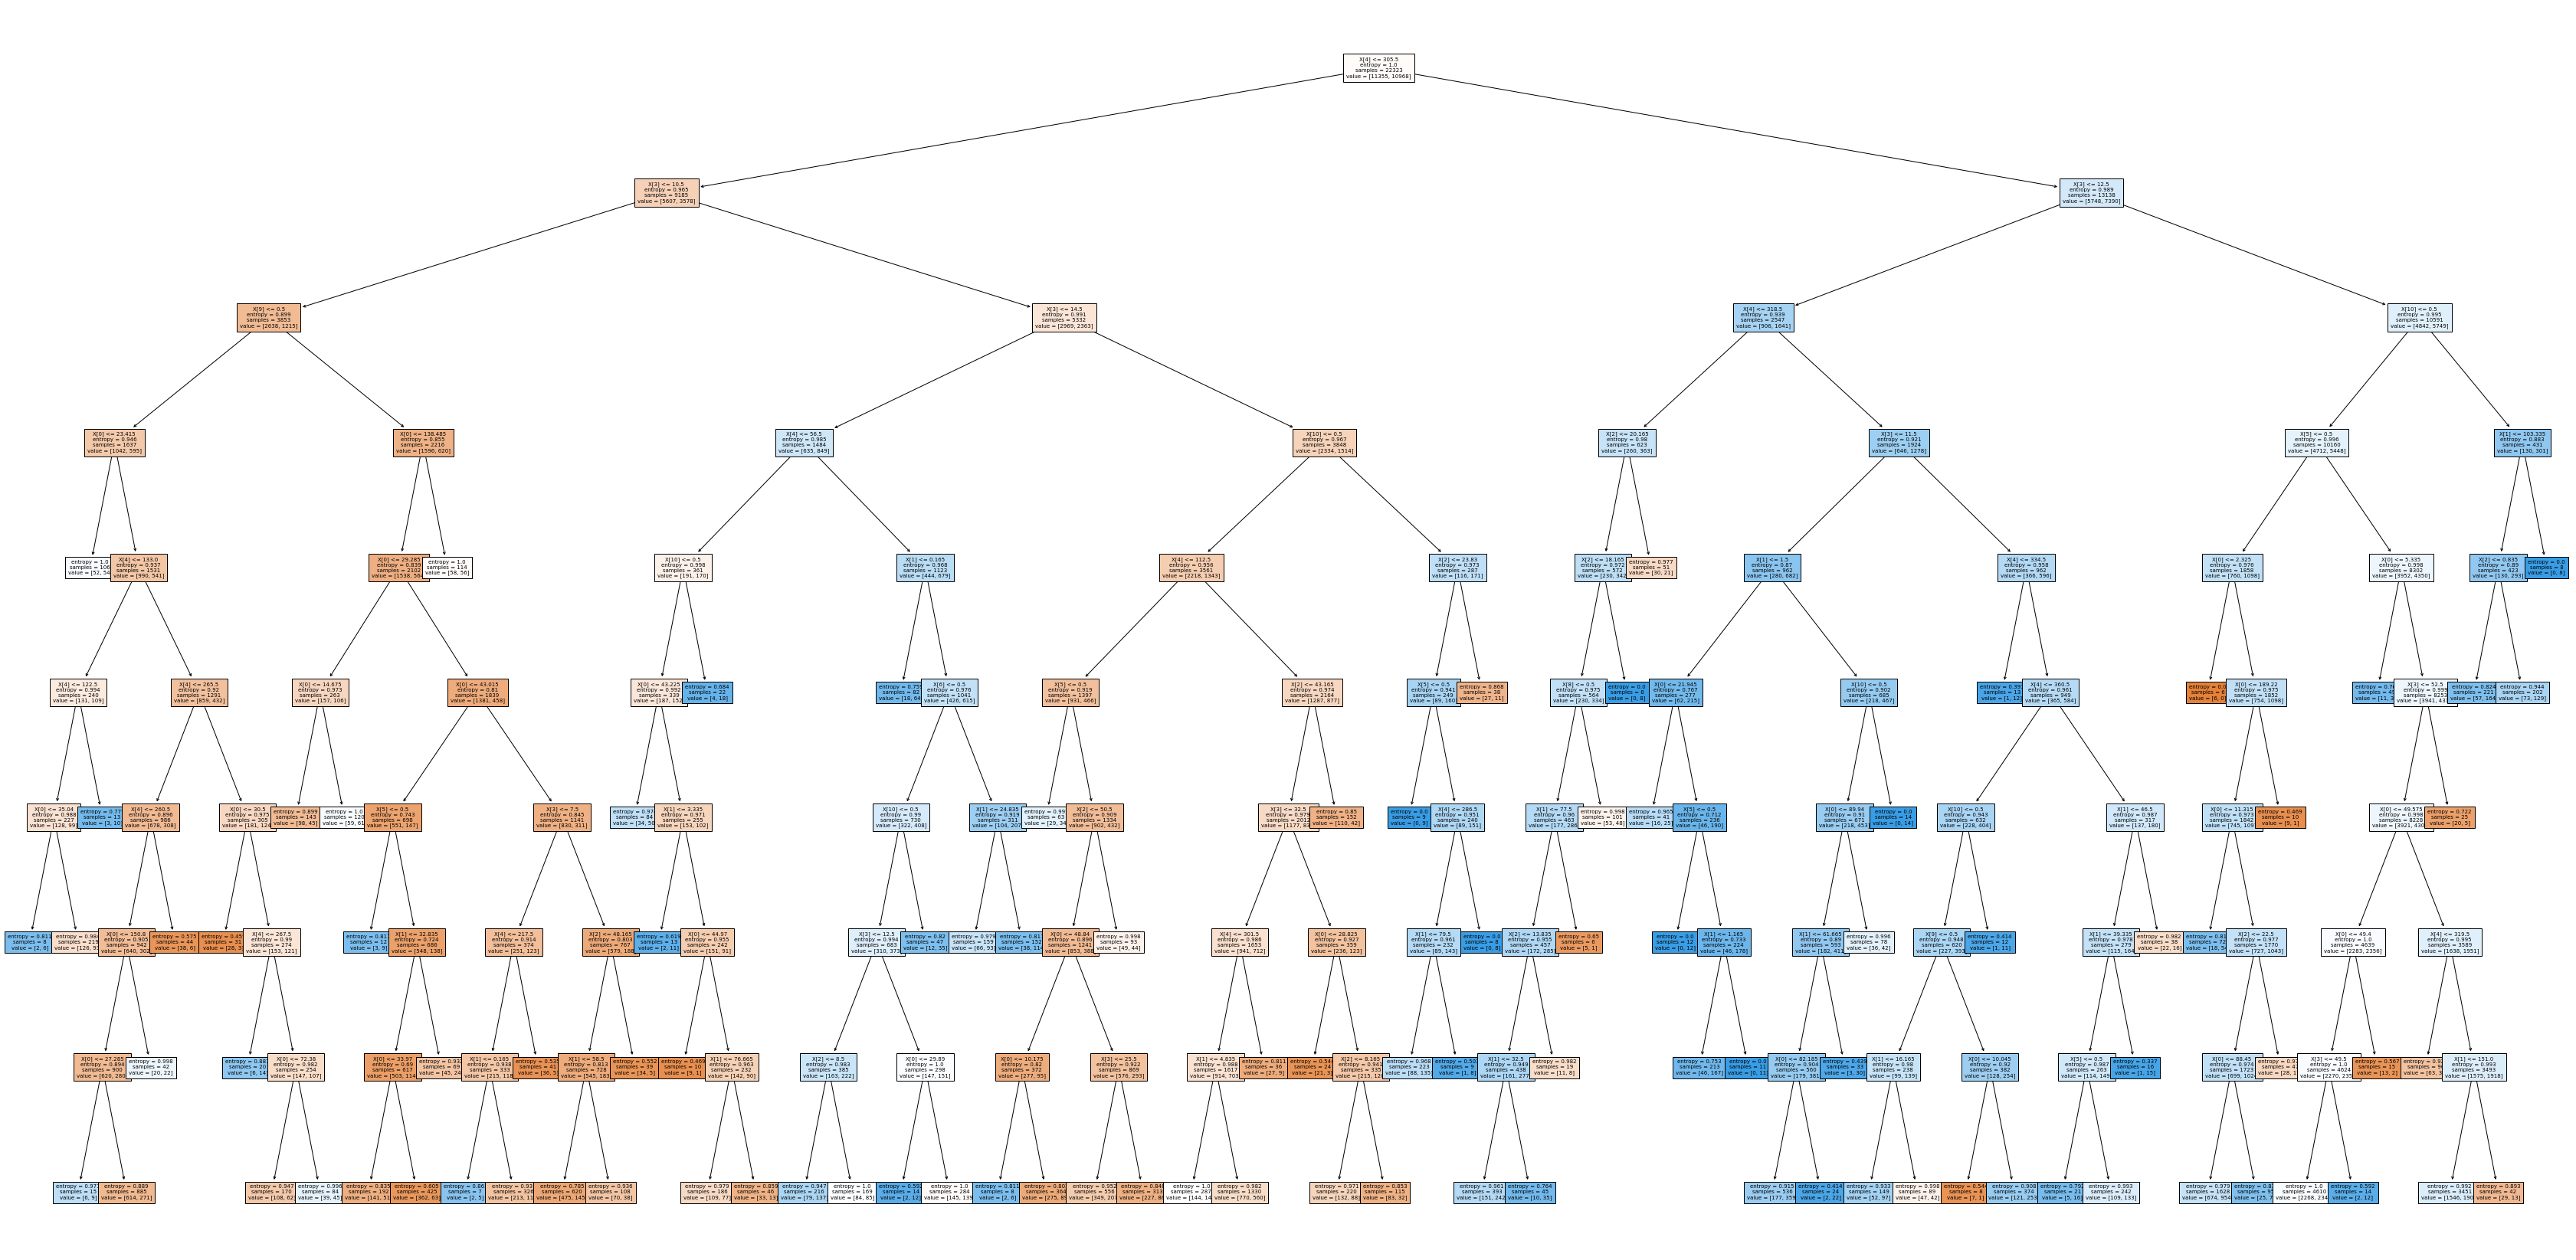

In [9]:
dt1 = tree.DecisionTreeClassifier(criterion = "entropy", 
                                  max_depth = 9,
                                  min_samples_leaf = 6,
                                  min_samples_split = 0.01)
dt1.fit(X_train, y_train)

y_pred = dt1.fit(X_train, y_train).predict(X_test)

plt.figure(figsize=(60,30))  
tree.plot_tree(dt1, fontsize=7,filled = True)
plt.show()

In [10]:
from sklearn.metrics import confusion_matrix
Confusion_Matrix=pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['Predicted not churn','Predicted churn'],
                             index=['True not churn','True churn'])
Confusion_Matrix

,Predicted not churn,Predicted churn
True not churn,2084,2597
True churn,1319,3568
